## SEIS 764-01 Assignment 7
**Jamie Boehme**

Import libraries for processing

In [38]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

Read data from google colab drive

In [39]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/My Drive/Colab Notebooks/Iris_Imgs"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
batch_size = 10

data = ImageDataGenerator(rescale=1. / 255, 
                          validation_split=0.2)

training_data = data.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Iris_Imgs', 
                                         target_size=(200, 200), shuffle=True, batch_size = batch_size, 
                                         class_mode='categorical', subset='training')

training_data_noshuffle = data.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Iris_Imgs', 
                                         target_size=(200, 200), shuffle=False, batch_size = batch_size, 
                                         class_mode='categorical', subset='training')

test_data = data.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Iris_Imgs', 
                                     target_size=(200, 200), batch_size = batch_size, shuffle=False,
                                     class_mode='categorical', subset='validation')

numClasses = 3

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


2. Build CNN model to classify Iris images into 3 classes (setosa, versicolor, virginica) using CNN with at least TWO convolution layers

In [41]:
Classifier=Sequential()
Classifier.add(Conv2D(16, kernel_size=(5, 5), input_shape=(200, 200, 3)))
Classifier.add(Activation('relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
               
Classifier.add(Conv2D(32, kernel_size=(3, 3)))
Classifier.add(BatchNormalization())
Classifier.add(Activation('relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(64, kernel_size=(3, 3)))
Classifier.add(BatchNormalization())
Classifier.add(Activation('relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Dropout(0.2))

Classifier.add(Flatten())

Classifier.add(Dense(64, activation='relu'))
Classifier.add(Dense(32, activation='relu'))
Classifier.add(Dense(16, activation='relu'))
Classifier.add(Dense(8, activation='relu'))
Classifier.add(Dense(numClasses, activation='softmax'))

In [ ]:
# More options in Compiling and Training CNN
MyEpochs = 30
opt = SGD(learning_rate=0.01, momentum=0.9)

Classifier.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt, 
              metrics=['accuracy']) 

Classifier.fit(training_data,
                        batch_size = 10,
                        epochs = MyEpochs,
                        validation_data=test_data,
                        shuffle = 1,
                        verbose=0)

3. Print the configurations (i.e. architecture) of all the layers in your CNN

In [43]:
Classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 196, 196, 16)      1216      
                                                                 
 activation_6 (Activation)   (None, 196, 196, 16)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 98, 98, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 32)        4640      
                                                                 
 batch_normalization_4 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 96, 96, 32)       

4. Print the confusion matrix of your classification result, and what is the accuracy of classification result. The results shown below is of **Train Data**

In [44]:
training_data.reset()
test_data.reset()

predicted_scores = Classifier.predict(training_data_noshuffle, verbose=1)
predicted_labels = predicted_scores.argmax(axis=1) 

train_labels = training_data_noshuffle.labels

acc_score = accuracy_score(train_labels, predicted_labels)
CFM = confusion_matrix(train_labels, predicted_labels)

print("\n", "Accuracy: " + str(format(acc_score,'.3f')))
print("\n", "CFM: \n", confusion_matrix(train_labels, predicted_labels))
print("\n", "Classification report: \n", classification_report(train_labels, predicted_labels))

12/12 [==============================] - 2s 169ms/step

 Accuracy: 0.942

 CFM: 
 [[35  5  0]
 [ 0 40  0]
 [ 0  2 38]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        40
           1       0.85      1.00      0.92        40
           2       1.00      0.95      0.97        40

    accuracy                           0.94       120
   macro avg       0.95      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120



4. Print the confusion matrix of your classification result, and what is the accuracy of classification result. The results shown below is of **Test Data**

In [45]:
predicted_scores = Classifier.predict(test_data, verbose=1)
predicted_labels = predicted_scores.argmax(axis=1) 

test_labels = test_data.labels

acc_score = accuracy_score(test_labels, predicted_labels)
CFM = confusion_matrix(test_labels, predicted_labels)

print("\n", "Accuracy: " + str(format(acc_score,'.3f')))
print("\n", "CFM: \n", confusion_matrix(test_labels, predicted_labels))
print("\n", "Classification report: \n", classification_report(test_labels, predicted_labels))


3/3 [==============================] - 1s 161ms/step

 Accuracy: 0.967

 CFM: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



test dataset accuracy: 0.9666666666666667


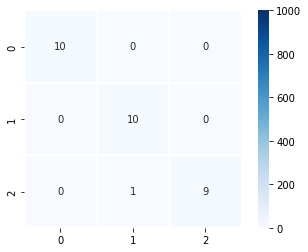

In [46]:
matrix=sns.heatmap(CFM, linewidths=1,vmax=1000,
                  square=True, cmap="Blues",annot=True)
accuracy_score=accuracy_score(test_labels, predicted_labels)
print('test dataset accuracy:',accuracy_score)